# Deep Learning

## Intro

An abstraction of https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py

In [1]:
import numpy as np
import torch

### Scalar
$x = \begin{bmatrix} 2\end{bmatrix}$

In [2]:
x = np.array([5])
print(x)

[5]


### Vector (Vector Matrix)

$x = \begin{bmatrix} 9\\ 4\end{bmatrix}$

In [3]:
x = np.array([6, 1])
print(x)

[6 1]


### Matrix

$A = \begin{bmatrix} 3 &5 &8 \\1 &1 &7 \\2 &1 &1\end{bmatrix}$

In [4]:
A = np.array([[3, 5, 8],
              [1, 1, 7],
              [2, 1, 1]])
print(A)

[[3 5 8]
 [1 1 7]
 [2 1 1]]


### Tensor 
Matrices in a Matrix:

$x = \begin{bmatrix} \begin{bmatrix} 1 &5\end{bmatrix} &\begin{bmatrix} 3 &8\end{bmatrix} \\\begin{bmatrix} 7 &2\end{bmatrix} &\begin{bmatrix} 1 &1\end{bmatrix}\end{bmatrix}$


In [5]:
x = torch.rand(4, 2)
print(x)

tensor([[0.4174, 0.3170],
        [0.5991, 0.9864],
        [0.3171, 0.1776],
        [0.0619, 0.7359]])


In [6]:
x = torch.rand(4, 2)
y = torch.rand(4, 2)

print(torch.add(x, y))

tensor([[0.5454, 1.1786],
        [1.8211, 0.8589],
        [0.6221, 1.2042],
        [0.6874, 1.7811]])


### Building Blocks

$x = \begin{bmatrix} x_{1} &x_{2} &... &x_{n}\end{bmatrix}$,
$x^T = \begin{bmatrix} x_{1} \\x_{2} \\\vdots \\x_{n}\end{bmatrix}$

$w = \begin{bmatrix} w_{1} &w_{2} &... &w_{n}\end{bmatrix}$

$b = 1(w_{0}) = w_{0}$

### Perceptron



$b + \sum xw$

$= b + x^Tw$

$=x^Tw + b$

$z = g(x^Tw + b)$

## Neural Network


### Loading Data and Hyperparameters

In [7]:
# hyperparameters
image_size = 28 # 28x28

epochs = 3
batch_size = 32
learning_rate = 0.00005

In [8]:
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform = transforms.Compose([
                  transforms.Resize(image_size),
                  transforms.ToTensor(),
                  transforms.Normalize((0.5,), (0.5)),
                  ])

dataset = datasets.MNIST(root="dataset/", train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("cuda" if torch.cuda.is_available() else "cpu")

cuda


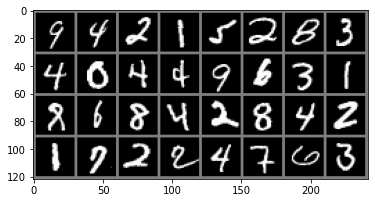

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

images, labels = iter(dataloader).next()
imshow(torchvision.utils.make_grid(images))

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # fully connected layers
    self.fc1 = nn.Linear(28 * 28, 256)
    self.fc2 = nn.Linear(256, 256)
    self.fc3 = nn.Linear(256, 10)
    
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return F.log_softmax(x)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [11]:
# optimizer
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# loss function
criterion = nn.CrossEntropyLoss()

In [12]:
# train loop
for epoch in range(epochs):  
  for batch_idx, (data, targets) in enumerate(dataloader):
    optimizer.zero_grad()
    net_out = net(data.view(data.size(0), -1))
    
    loss = criterion(net_out, targets)
    loss.backward()
    optimizer.step()
    
    if batch_idx % 250 == 0:
      print(f"Epoch {epoch}/{epochs} Batch {batch_idx}/{len(dataloader)} Batch Loss {loss}")

Epoch 0/3 Batch 0/1875 Batch Loss 2.308164596557617


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Epoch 0/3 Batch 250/1875 Batch Loss 2.2935330867767334
Epoch 0/3 Batch 500/1875 Batch Loss 2.266801118850708
Epoch 0/3 Batch 750/1875 Batch Loss 2.2358334064483643
Epoch 0/3 Batch 1000/1875 Batch Loss 2.2087631225585938
Epoch 0/3 Batch 1250/1875 Batch Loss 2.1786885261535645
Epoch 0/3 Batch 1500/1875 Batch Loss 2.1363883018493652
Epoch 0/3 Batch 1750/1875 Batch Loss 2.0913853645324707
Epoch 1/3 Batch 0/1875 Batch Loss 2.082275629043579
Epoch 1/3 Batch 250/1875 Batch Loss 2.016205072402954
Epoch 1/3 Batch 500/1875 Batch Loss 2.0154480934143066
Epoch 1/3 Batch 750/1875 Batch Loss 1.9044846296310425
Epoch 1/3 Batch 1000/1875 Batch Loss 1.8175678253173828
Epoch 1/3 Batch 1250/1875 Batch Loss 1.7047418355941772
Epoch 1/3 Batch 1500/1875 Batch Loss 1.7425063848495483
Epoch 1/3 Batch 1750/1875 Batch Loss 1.667839765548706
Epoch 2/3 Batch 0/1875 Batch Loss 1.7086354494094849
Epoch 2/3 Batch 250/1875 Batch Loss 1.6127393245697021
Epoch 2/3 Batch 500/1875 Batch Loss 1.5032100677490234
Epoch 2/3 

In [13]:
# testing

# NEED TO SPLIT TEST AND TRAIN DATA STILL
# NEED TO SPLIT TEST AND TRAIN DATA STILL